\


`easyXRD` has three main methods that are called before refinement:


- [`load_xrd_data`](https://github.com/MehmetTopsakal/easyXRD/blob/7ca2cf988d29b7b923d0522993866e3cc7ba90e7/easyxrd/core.py#L401C9),
- [`get_baseline`](https://github.com/MehmetTopsakal/easyXRD/blob/7ca2cf988d29b7b923d0522993866e3cc7ba90e7/easyxrd/core.py#L670),
- [`load_phases`](https://github.com/MehmetTopsakal/easyXRD/blob/7ca2cf988d29b7b923d0522993866e3cc7ba90e7/easyxrd/core.py#L1507),

This notebook explains these methods in more detail.

As in previous notebooks, we need to execute next cell (`Shift + Enter`) in order to run this notebook on Google Colab.

In [1]:
# This clones easyXRD repo from GitHub
!! git clone --depth=1 https://github.com/MehmetTopsakal/easyXRD.git

# This clones easyXRD_examples repo from GitHub
!! git clone --depth=1 https://github.com/MehmetTopsakal/easyXRD_examples.git

# Although Google Colab environment has many packages pre-installed, we need a few more python packages to be installed.
# Lines below do all the necessary installs for us
!! pip install numpy==1.26.4
!! pip install pyFAI==2024.9.0
!! pip install fabio==2024.9.0
!! pip install pybaselines
!! pip install pymatgen
!! pip install mp_api
!! pip install ipympl

# Finally, we nedd to reset kernel for the new package installations to take effect
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

!! echo done

['done']

In [11]:
# Now we can import easyXRD functions
import sys
sys.path += ["easyXRD"]
from easyxrd.core import exrd


%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True  # For better plots.

import os
import fabio
import pyFAI

pyFAI.use_opencl = False
import numpy as np


# change into data directory that is provided with easyXRD_examples repository
import os
os.chdir("easyXRD_examples/data")

In [12]:
# We can list the contents of currant working directory with listdir function
os.listdir()

['Kapton', 'geometry.poni', 'mask.edf', 'LaB6_CeO2_mix', 'CeO2', 'LaB6']

# load_xrd_data

Here we start with `load_xrd_data`. In a notebook cell you can get the signature of a method using `?`

In [13]:
exrd.load_xrd_data?

In the cells below, we will explain what do these keywords mean.
There are seven ways to import an XRD data into easyXRD.

- `from_txt_file`
- `from_tiff_file`
- `from_img_array`
- `from_i1d_array`
- `from_da_i1d`
- `from_da_i2d`
- `from_nc_file`

## from_txt_file

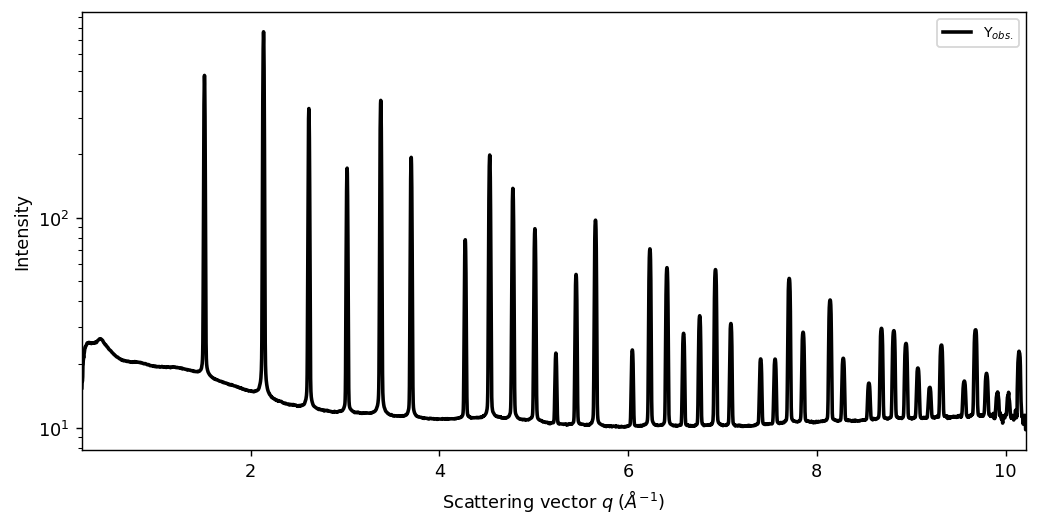

In [14]:
# As explained in first notebook, 01_basic.ipynb.

# First, we need to init exrd object.
sample = exrd()

# from_txt_file requires the wavelenght of X-ray that needs to be provided using txt_file_wavelength_in_angstrom keyword.
sample.load_xrd_data(
    from_txt_file="LaB6/LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstrom=0.1814,
    plot=True,
)

## from_tiff_file

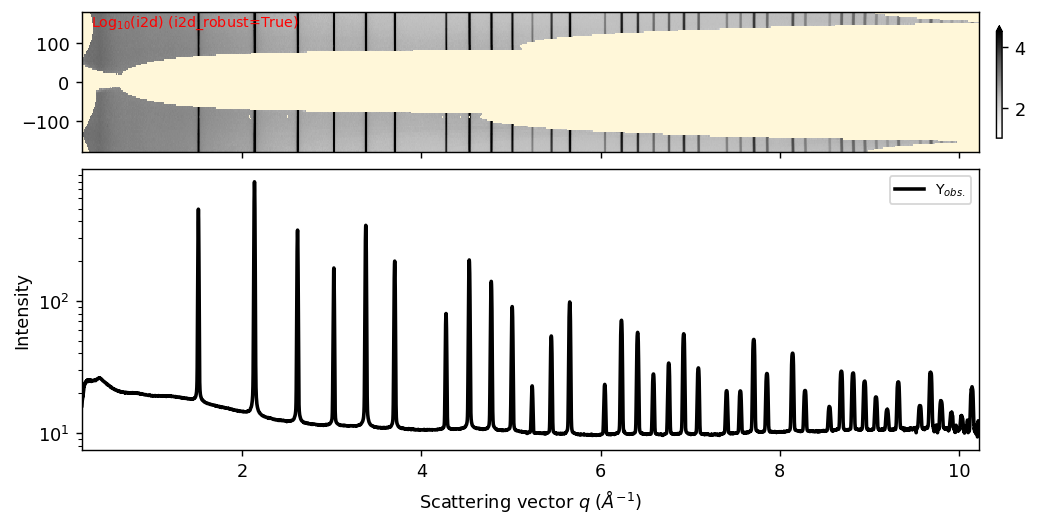

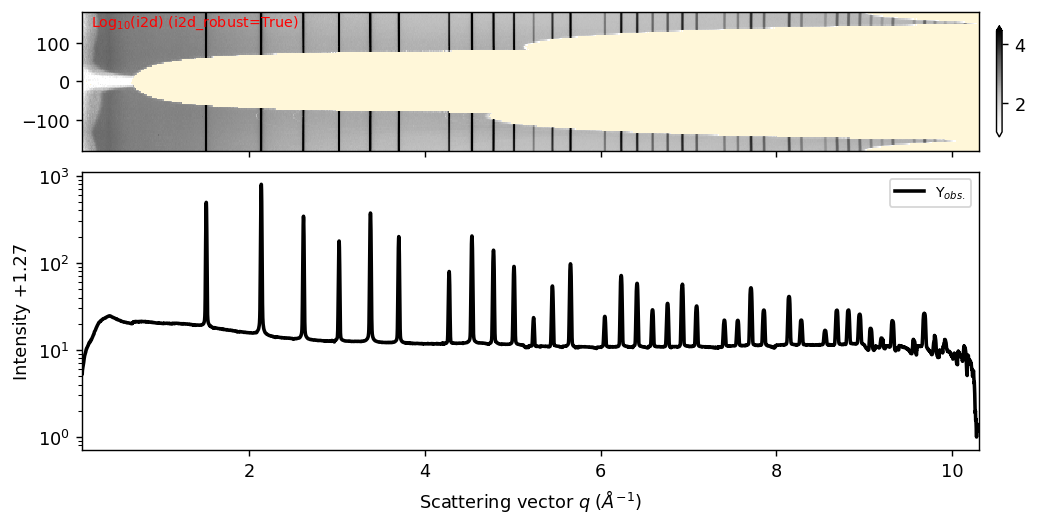

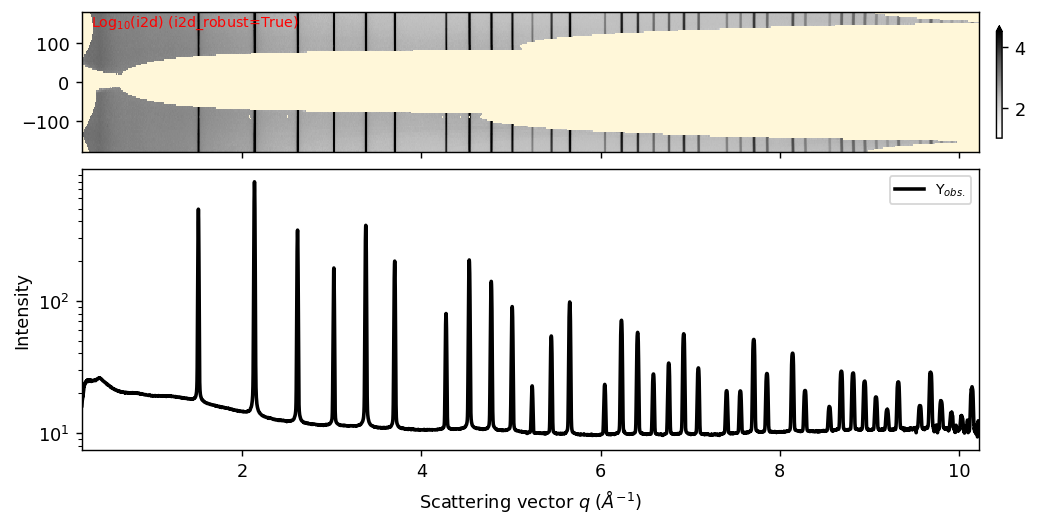

In [15]:
# As explained in second notebook, 02_intermediate.ipynb.

# from_tiff_file requires at least a poni file or previously loaded pyFAI ai object.
sample = exrd()
sample.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
)


# if you don't have a mask file, you can chose not to use masking.
# As in in this case, integrated 1d pattern will be different than the masked one.
sample = exrd()
sample.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file=None,
)


# If you have a .poni and/or mask files, it is better to load them first so that we can reuse,
ai = pyFAI.load("geometry.poni")
mask = fabio.open("mask.edf").data

sample = exrd()
sample.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    ai=ai,
    mask=mask,
)

## from_img_array

<class 'numpy.ndarray'>


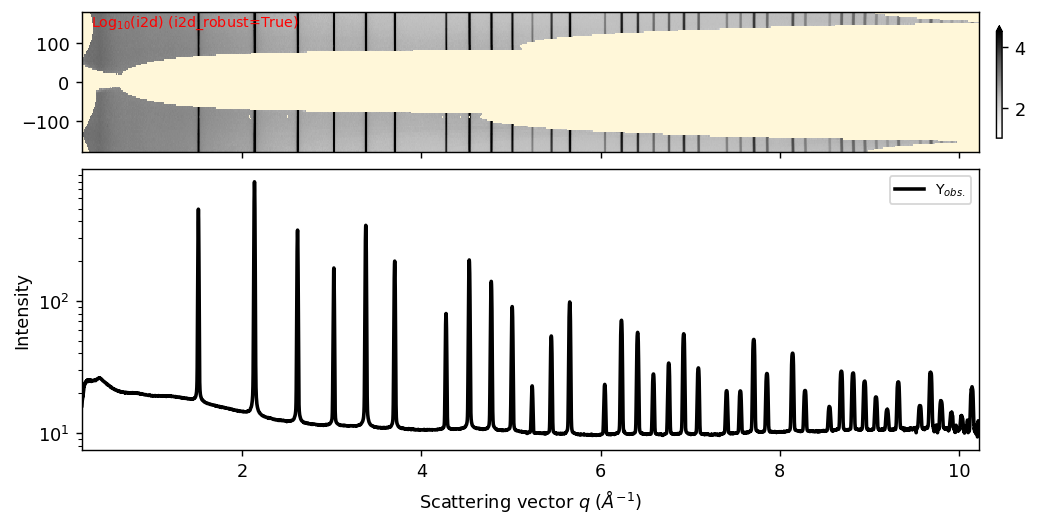

In [ ]:
# In some cases, the image data can be stored in an array rather than in a tiff file.
# In this case, we can use load_xrd_data keyword as shown below afte we load the image data.

ai = pyFAI.load("geometry.poni")
mask = fabio.open("mask.edf").data
img = fabio.open("LaB6/img.tiff").data

print(type(img))

sample = exrd()
sample.load_xrd_data(
    from_img_array=img,
    ai=ai,
    mask=mask,
)

## from_i1d_array

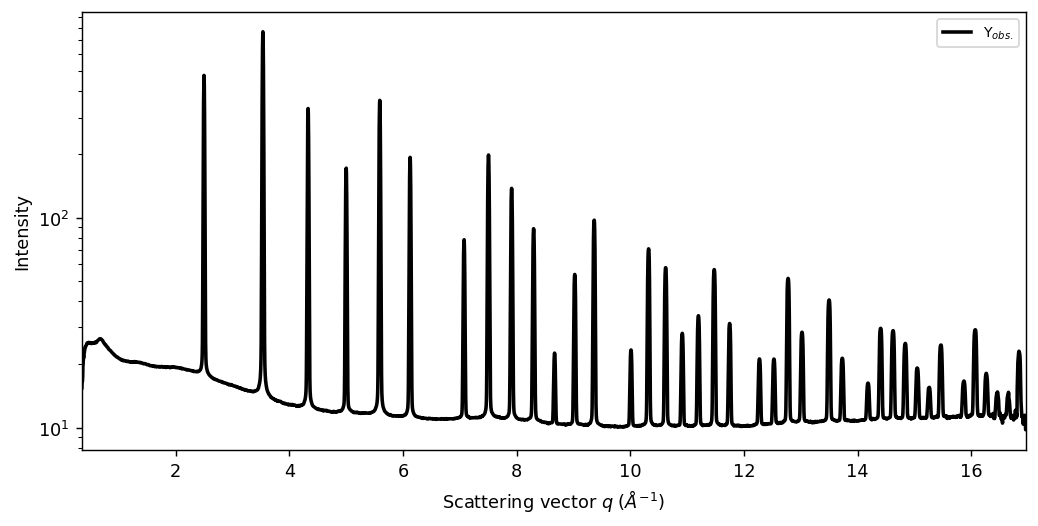

In [ ]:
# Similarly, we can load 1d-profile (i1d) beforehand and use from_i1d_array keyword.
# In this case, we need to provide wavelength using i1d_array_wavelength_in_angstrom keyword

i1d_data = np.loadtxt("LaB6/LaB6_synchrotron_XRD_from_28ID-2.xy")

sample = exrd()
sample.load_xrd_data(
    from_i1d_array=i1d_data,
    i1d_array_wavelength_in_angstrom=0.1814,
)

## from_da_i1d

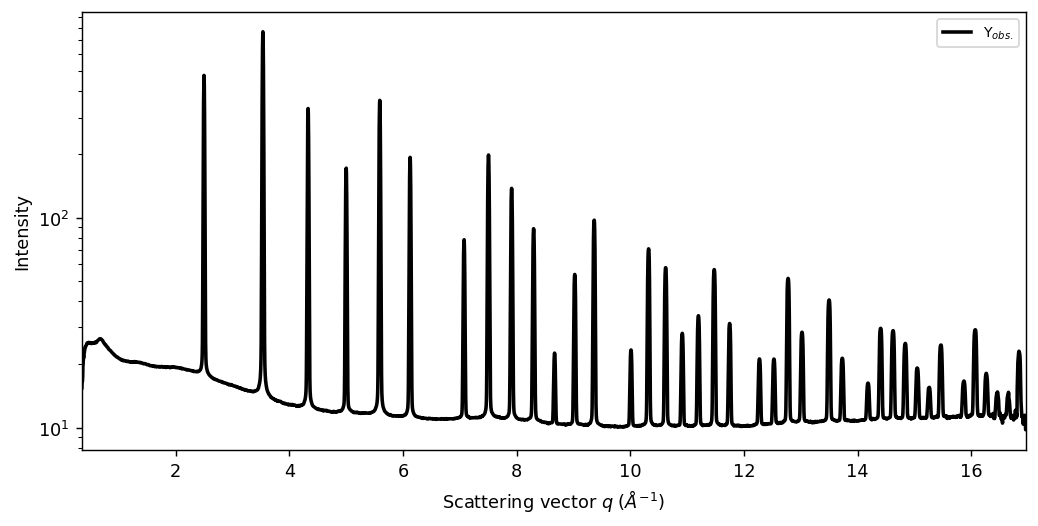

In [ ]:
# load_xrd_data creates a xarray dataset and stores loaded data in it.
# We can access i1d data in previously loaded dataset and use it in a new exrd object as shown below.

# Loading a test sample first.
sample_preloaded = exrd()
sample_preloaded.load_xrd_data(
    from_i1d_array=i1d_data, i1d_array_wavelength_in_angstrom=0.1814, plot=False
)


# and using the loaded data in a new sample object.
sample = exrd()
sample.load_xrd_data(
    from_da_i1d=sample_preloaded.ds.i1d,
)

## from_da_i2d

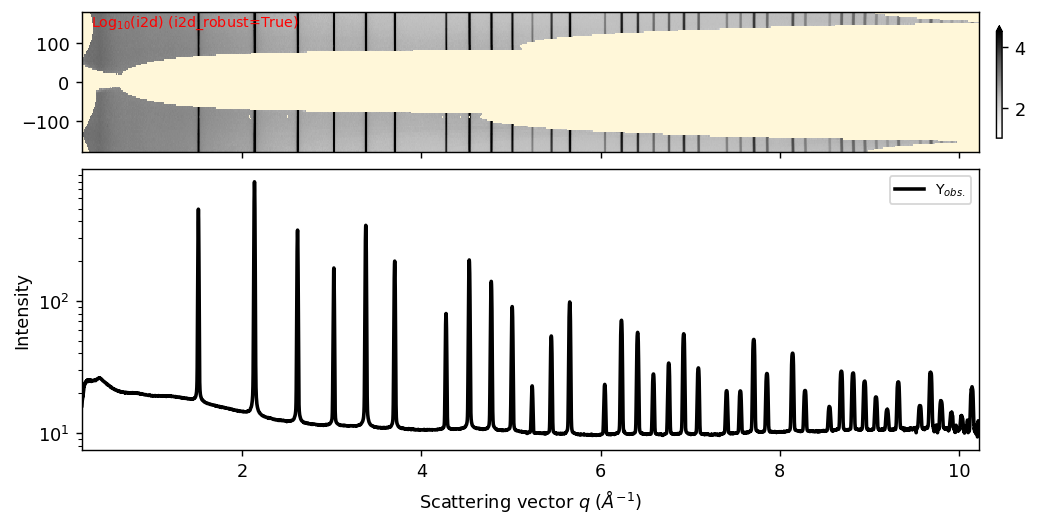

In [ ]:
# This is same as from_da_i1d but for i2d

sample_preloaded = exrd()
sample_preloaded.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
)

# and using the loaded data in a new sample object.
sample = exrd()
sample.load_xrd_data(
    from_da_i2d=sample_preloaded.ds.i2d,
)

## from_nc_file

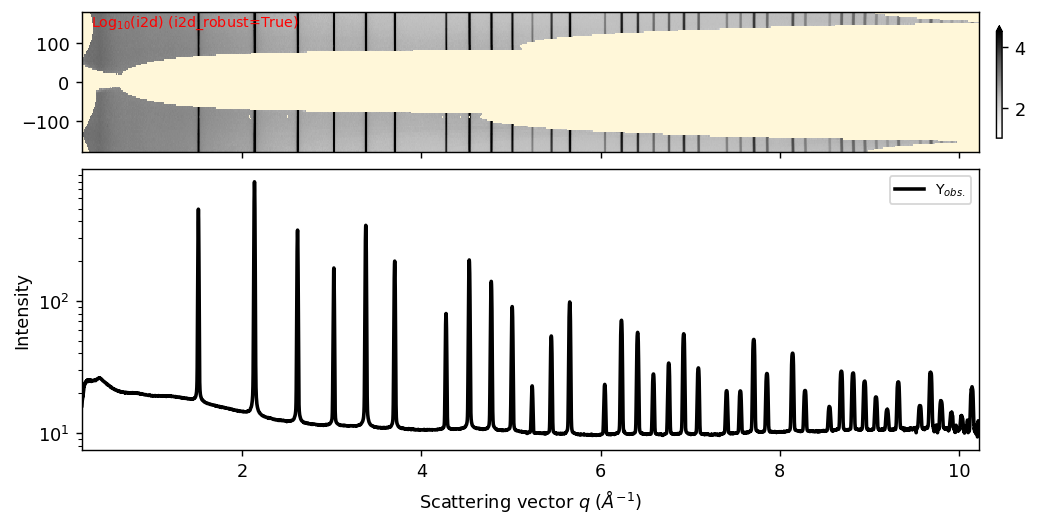

In [ ]:
# In some cases, i1d or i2d data might be stored in an xarray nc file.


# sample_preloaded = exrd()
# sample_preloaded.load_xrd_data(
#     from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
#     txt_file_wavelength_in_angstrom=0.1814,
#     plot=False,
# )
sample_preloaded = exrd()
sample_preloaded.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
)

sample_preloaded.ds.to_netcdf("data.nc")

# and using the loaded data in a new sample object.
sample = exrd()
sample.load_xrd_data(
    from_nc_file="data.nc",
)

## radial_range

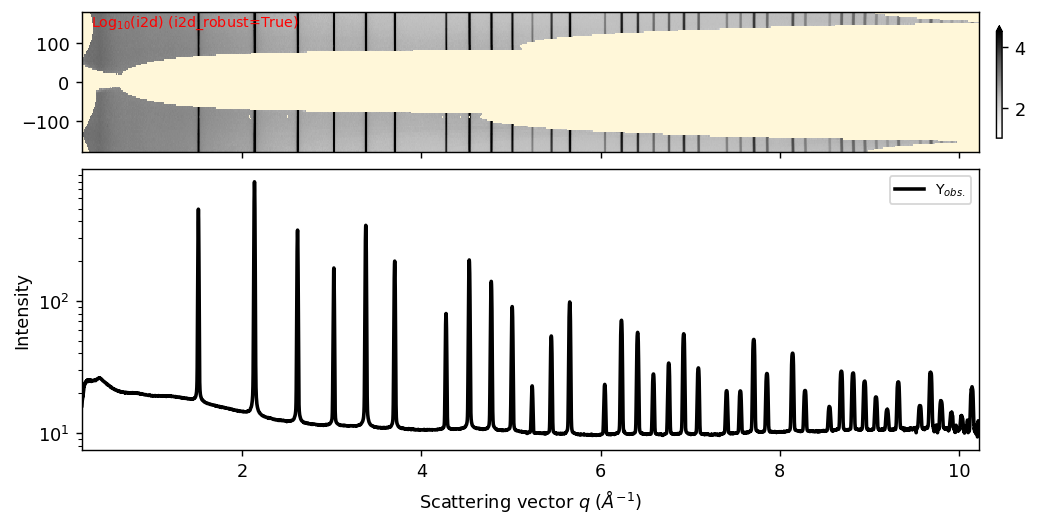

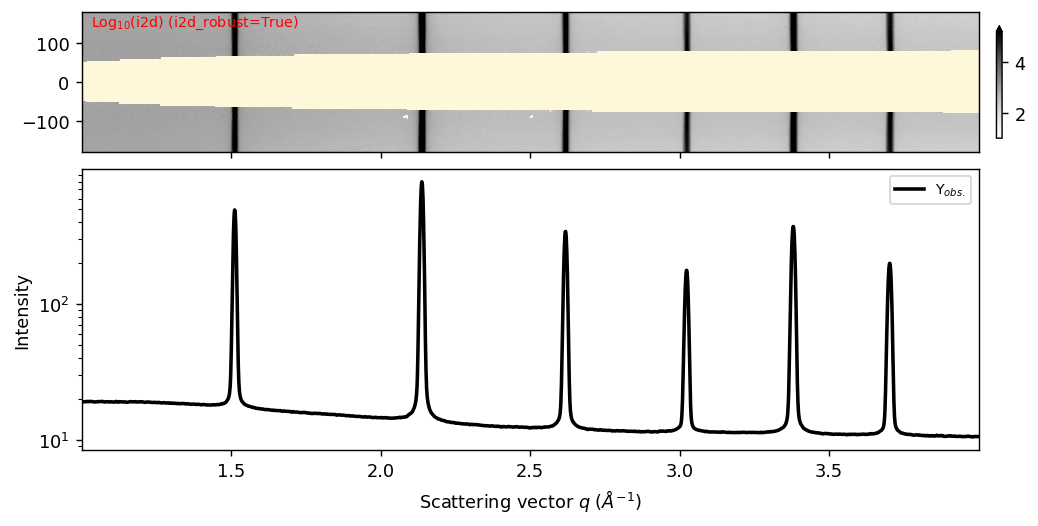

In [ ]:
# If we need to set a custom radial range, we can use radial_range keyword.

ai = pyFAI.load("geometry.poni")
mask = fabio.open("mask.edf").data
img = fabio.open("LaB6/img.tiff").data


# default radial_range is from 0.1 to 11.1 or limits of the input data
sample = exrd()
sample.load_xrd_data(from_img_array=img, ai=ai, mask=mask)

# user set radial_range
sample = exrd()
sample.load_xrd_data(from_img_array=img, ai=ai, mask=mask, radial_range=(1, 4))

## delta_q

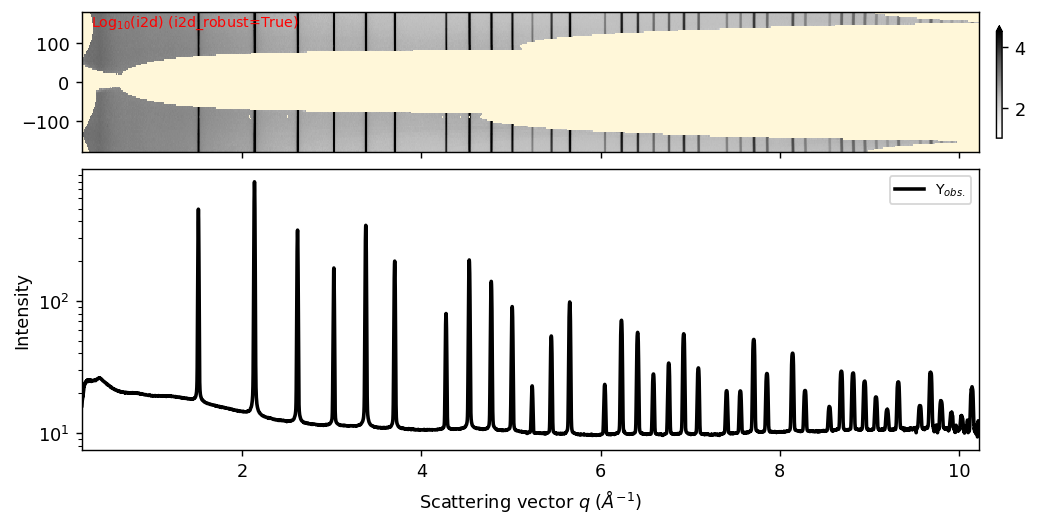

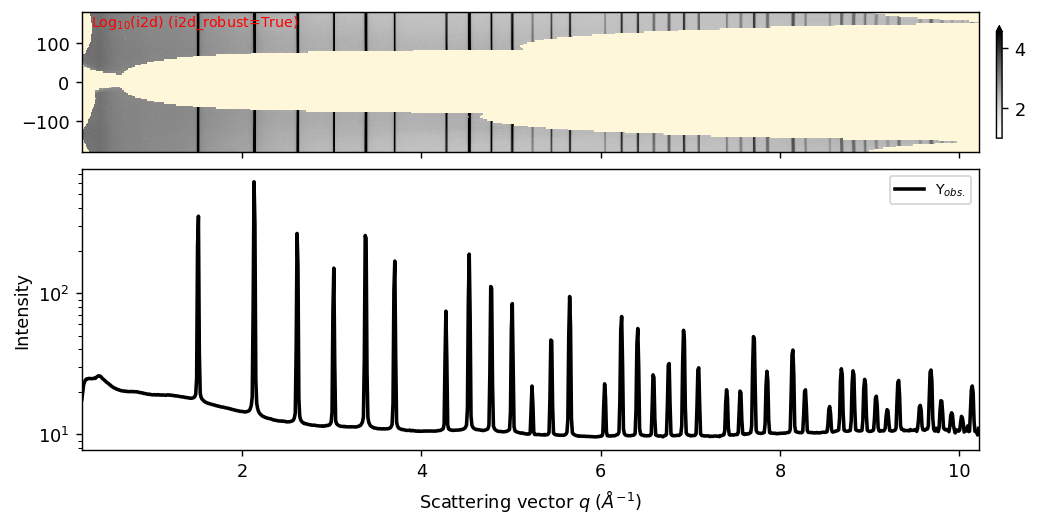

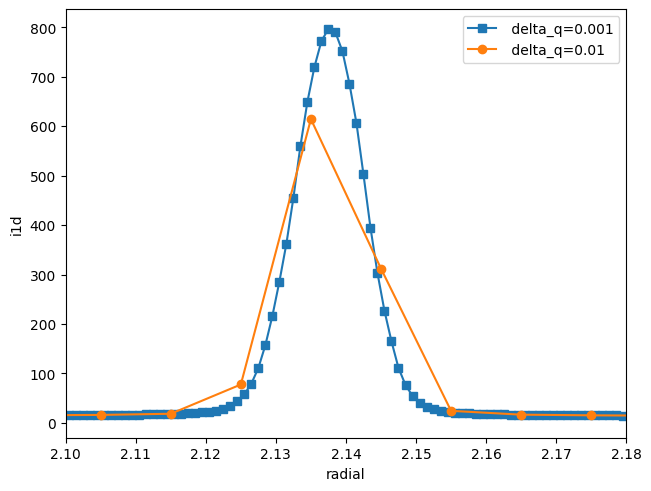

In [ ]:
# delta_q keyword specifies radial grid integration points.


ai = pyFAI.load("geometry.poni")
mask = fabio.open("mask.edf").data
img = fabio.open("LaB6/img.tiff").data


# default delta_q is 0.001
sample_dq0001 = exrd()
sample_dq0001.load_xrd_data(
    from_img_array=img, ai=ai, mask=mask, delta_q=0.001  # default
)


# here we can set it to higher value (coarser gerid)
sample_dq0010 = exrd()
sample_dq0010.load_xrd_data(from_img_array=img, ai=ai, mask=mask, delta_q=0.01)


plt.figure()
sample_dq0001.ds.i1d.plot(marker="s", label=" delta_q=0.001")
sample_dq0010.ds.i1d.plot(marker="o", label=" delta_q=0.01")
plt.xlim([2.1, 2.18])
plt.legend()

## npt_azimuthal

Text(0.5, 1.0, 'npt_azimuthal = 361')

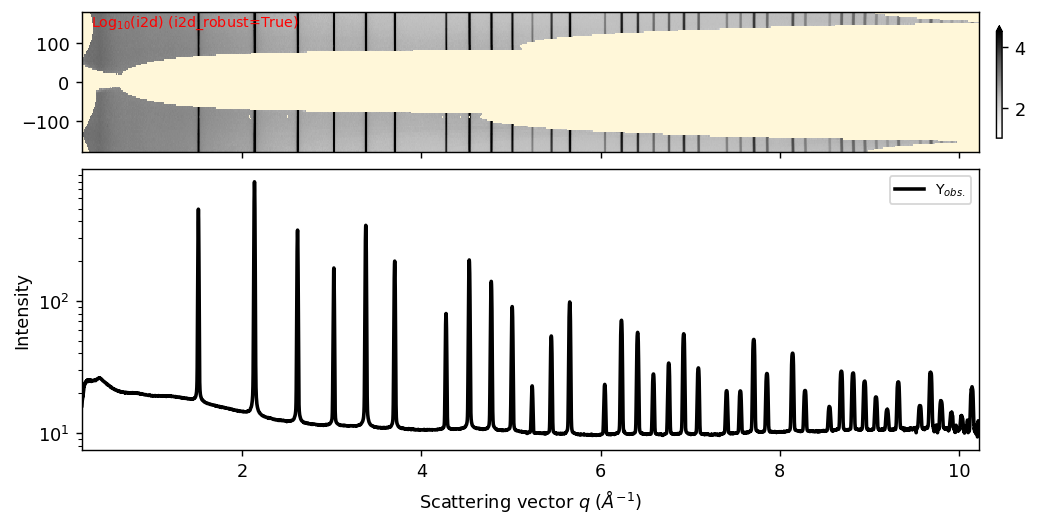

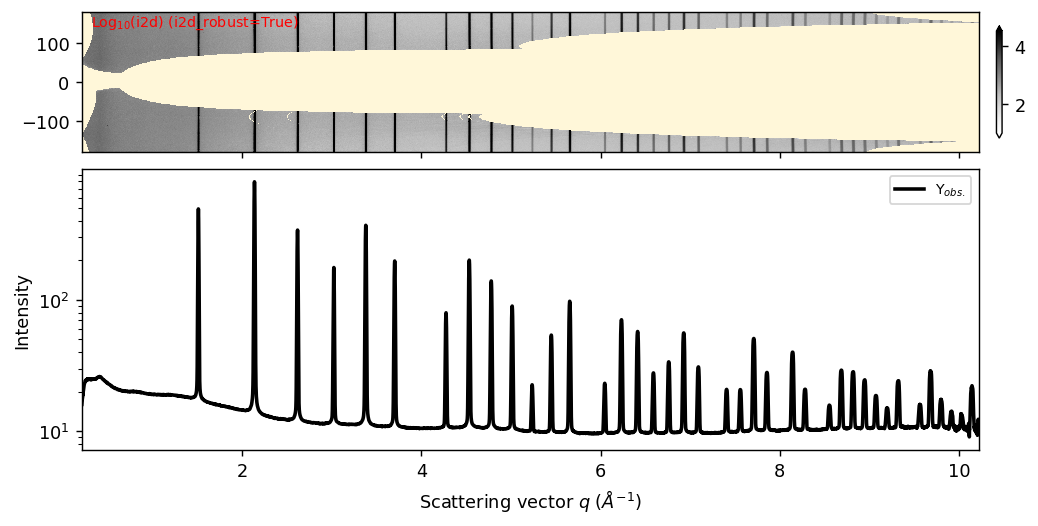

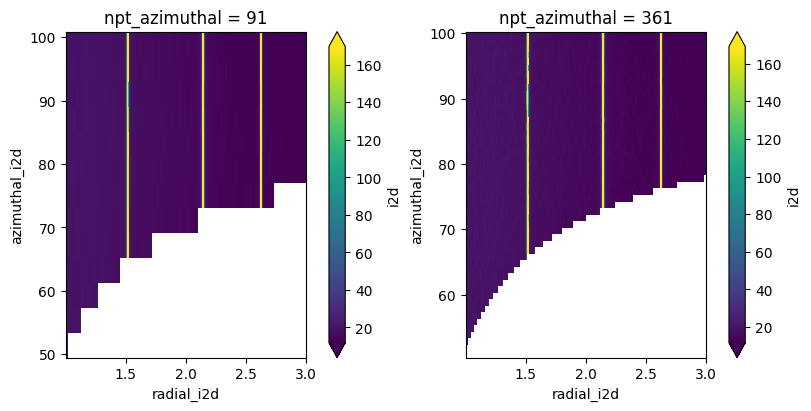

In [ ]:
# Similar to delta_q keyword, we can also use npt_azimuthal keyword to define grid size in azimuthal direction of i2d image.


ai = pyFAI.load("geometry.poni")
mask = fabio.open("mask.edf").data
img = fabio.open("LaB6/img.tiff").data


# default delta_q is 0.001
sample_npta091 = exrd()
sample_npta091.load_xrd_data(from_img_array=img, ai=ai, mask=mask, npt_azimuthal=91)


# here we can set it to higher value (coarser gerid)
sample_npta361 = exrd()
sample_npta361.load_xrd_data(from_img_array=img, ai=ai, mask=mask, npt_azimuthal=361)


# apparently, npt_azimuthal = 91 is more pixelated
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
sample_npta091.ds.i2d.sel(radial_i2d=slice(1, 3)).sel(
    azimuthal_i2d=slice(50, 100)
).plot.imshow(robust=True)
ax.set_title("npt_azimuthal = 91")
ax = fig.add_subplot(1, 2, 2)
sample_npta361.ds.i2d.sel(radial_i2d=slice(1, 3)).sel(
    azimuthal_i2d=slice(50, 100)
).plot.imshow(robust=True)
ax.set_title("npt_azimuthal = 361")

## median_filter_kernel_size and median_filter_on_i2d

Synchrotron XRD is usually collected on a large area detector as the one in 28ID-2 (XPD) beamline of NSLS-II.\
However, these detectors may contain bad or dead pixels.

In cell below, we plot one of these pixels as shown in inset.

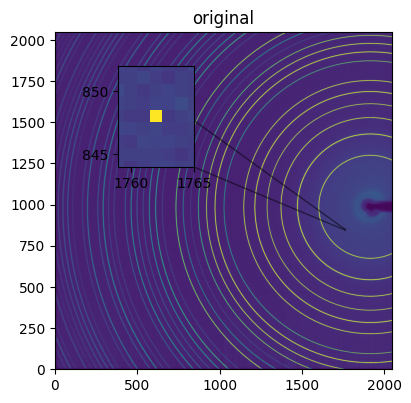

In [ ]:
img = fabio.open("LaB6/img.tiff").data


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img, vmin=0, vmax=100, origin="lower")
ax.set_title("original")
x1, x2, y1, y2 = 1759, 1765, 844, 852  # ROI
axins = ax.inset_axes([0.15, 0.6, 0.3, 0.3], xlim=(x1, x2), ylim=(y1, y2))
axins.imshow(img, origin="lower", vmin=0, vmax=100)
ax.indicate_inset_zoom(axins, edgecolor="black")

By using `medfilt2d`  as supplied by scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt2d.html

We can easily get rid of these defective pixels as shown in cell below.

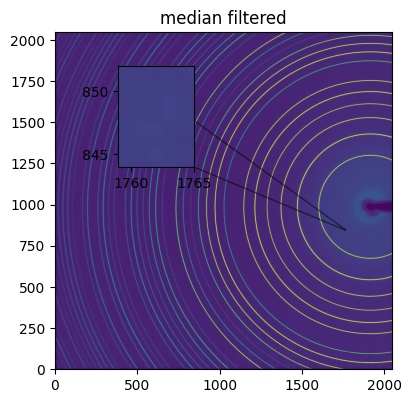

In [ ]:
from scipy.signal import medfilt2d

median_filter_kernel_size = (3, 3)

img_filtered = medfilt2d(img, kernel_size=median_filter_kernel_size)


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img_filtered, vmin=0, vmax=100, origin="lower")
ax.set_title("median filtered")
x1, x2, y1, y2 = 1759, 1765, 844, 852
axins = ax.inset_axes([0.15, 0.6, 0.3, 0.3], xlim=(x1, x2), ylim=(y1, y2))
axins.imshow(img_filtered, origin="lower", vmin=0, vmax=100)
ax.indicate_inset_zoom(axins, edgecolor="black")

`median_filter_kernel_size` keywork parameter on `load_xrd_data` method basically call this filter before integrating the 2D image.\

If `median_filter_on_i2d=False`, filtering is applied on raw 2D data. Otherwise, it is applied on integrated `i2d` image.

# get_baseline

In this section, we explore `get_baseline` keywords

In [ ]:
?exrd.get_baseline

Signature:
exrd.get_baseline(
    self,
    input_bkg=None,
    use_iarpls=True,
    radial_rolling=-1,
    iarpls_lam=100000.0,
    plot=True,
    get_i2d_baseline=False,
    use_i2d_baseline=False,
    roi_radial_range=None,
    roi_azimuthal_range=None,
    spotty_data_correction=False,
    spotty_data_correction_threshold=1,
)
Docstring: <no docstring>
File:      ~/easyXRD/easyxrd/core.py
Type:      function

In [ ]:
# Here we load the data first
sample = exrd(i1d_ylogscale=False, i2d_logscale=False)
sample.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
    radial_range=(0.35, 8),
)

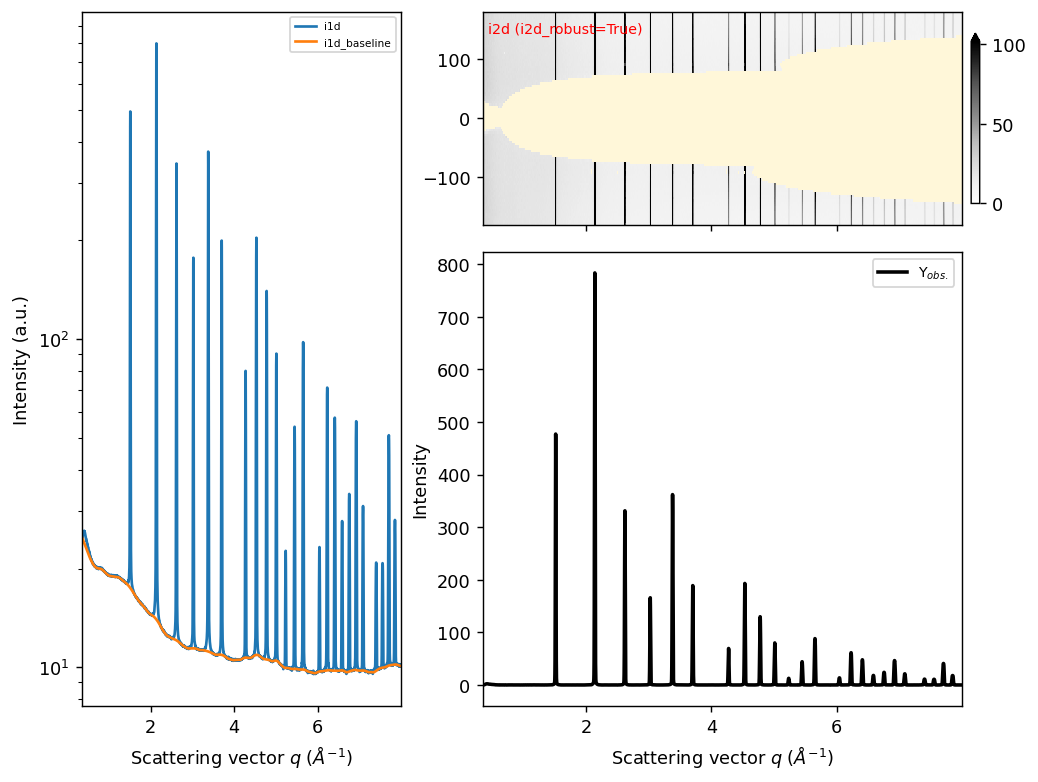

In [ ]:
# Callig get_baseline without any keywords uses iarpls function to
# estimate beaselie using Improved Asymmetrically Reweighted Penalized Least Squares
# ax explained in the link below:
# https://pybaselines.readthedocs.io/en/latest/algorithms/whittaker.html#iarpls-improved-asymmetrically-reweighted-penalized-least-squares
# This function also takes a lambda keyword,

# You can refer to pybaselines discussiin here:
# https://pybaselines.readthedocs.io/en/latest/generated/examples/whittaker/plot_lam_effects.html#sphx-glr-generated-examples-whittaker-plot-lam-effects-py

sample.get_baseline()

# Subplot on the left, shows the actual (i1d) and estimated baseline in y-axis log-scaled.
# On top right, i2d data is shown. On bottom right, baseline subtracted i1d is plotter.

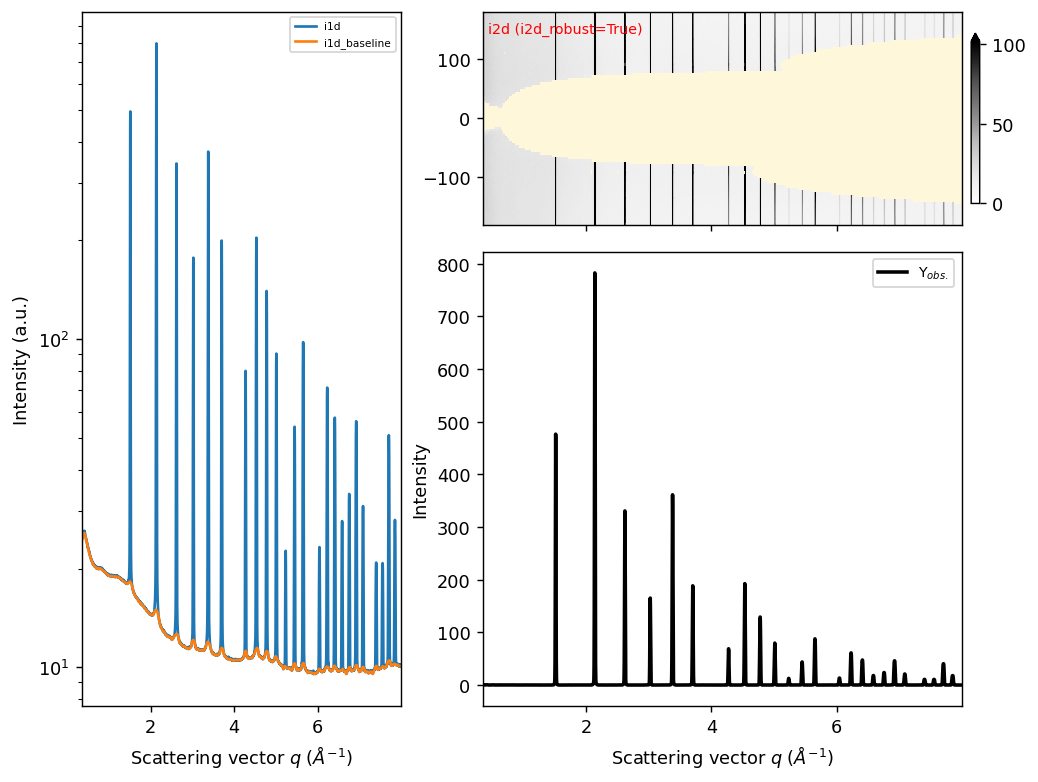

In [ ]:
# As shown in above plot, default call to get_baseline is not able to find correct baseline as
# there is a peak in low q. We can decrease iarpls_lam to lower value from 100000 to  100
sample.get_baseline(iarpls_lam=100)

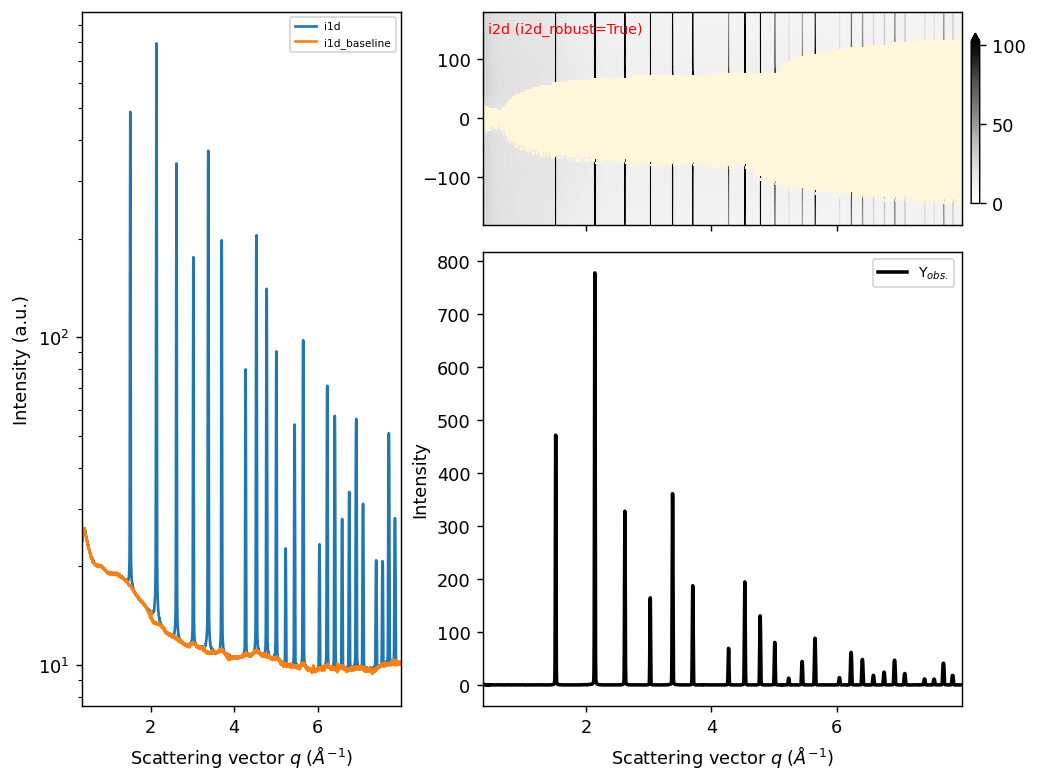

In [ ]:
# However, this is not ideal as the baseline (orange in plot above) starts to go into peaks.
# Instead, we should use actual blank xrd (usually empty capillary).

bkg = exrd()
bkg.load_xrd_data(
    from_tiff_file="Kapton/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
    radial_range=(0.35, 8),
)

sample.get_baseline(input_bkg=bkg)

By default in `get_baseline` method, baseline is calculated on i1d data if `get_i2d_baseline=False`.
If we set it to True `get_i2d_baseline=True`, baseline is calculated on i2d first and then it is subtracted
from i2d before azimuthal averaging. Although the difference is not much in cel below, there are
some situations in which there will be quite difference between `get_i2d_baseline=True` and `get_i2d_baseline=False`.

In addition to `get_i2d_baseline`, we need to set `use_i2d_baseline=True` for getting i2d subtracted baseline.


<xarray.Dataset> Size: 6MB
Dimensions:        (azimuthal_i2d: 91, radial_i2d: 7650, radial: 7650)
Coordinates:
  * azimuthal_i2d  (azimuthal_i2d) float32 364B -178.0 -174.1 ... 174.1 178.0
  * radial_i2d     (radial_i2d) float32 31kB 0.3505 0.3515 0.3525 ... 7.999 8.0
  * radial         (radial) float32 31kB 0.3505 0.3515 0.3525 ... 7.999 8.0
Data variables:
    i2d            (azimuthal_i2d, radial_i2d) float32 3MB 24.77 24.22 ... 9.996
    i2d_baseline   (azimuthal_i2d, radial_i2d) float32 3MB 21.62 21.56 ... 10.03
    i1d_baseline   (radial) float32 31kB 23.73 23.67 23.62 ... 10.06 10.04 10.02
    i1d            (radial) float32 31kB 25.01 25.0 24.95 ... 10.13 10.1 10.06

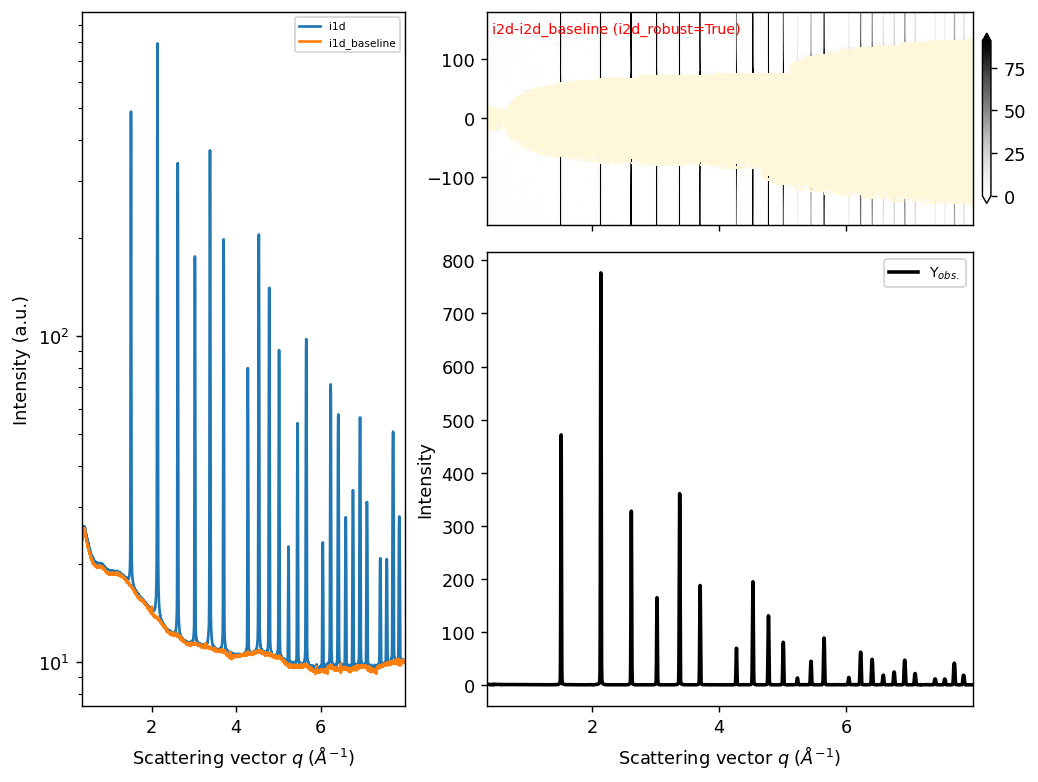

In [ ]:
sample = exrd(i1d_ylogscale=False, i2d_logscale=False)
sample.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
    radial_range=(0.35, 8),
)
bkg = exrd()
bkg.load_xrd_data(
    from_tiff_file="Kapton/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
    radial_range=(0.35, 8),
)

sample.get_baseline(
    input_bkg=bkg, get_i2d_baseline=True, use_i2d_baseline=True, iarpls_lam=1000000
)

sample.ds

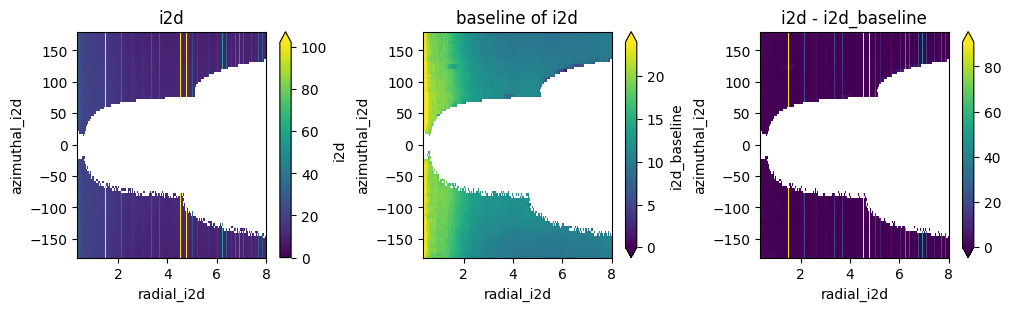

In [ ]:
# We can visulaize the i2d baseline

fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(1, 3, 1)
sample.ds.i2d.plot.imshow(robust=True, ax=ax, vmin=0)
ax.set_title("i2d")

ax = fig.add_subplot(1, 3, 2)
sample.ds.i2d_baseline.plot.imshow(robust=True, ax=ax, vmin=0)
ax.set_title("baseline of i2d")

ax = fig.add_subplot(1, 3, 3)
(sample.ds.i2d - sample.ds.i2d_baseline).plot.imshow(robust=True, ax=ax, vmin=0)
ax.set_title("i2d - i2d_baseline");

`roi_radial_range` and `roi_azimuthal_range` keywords allows us to specify azimuthal and radial ranges before baseline estimation

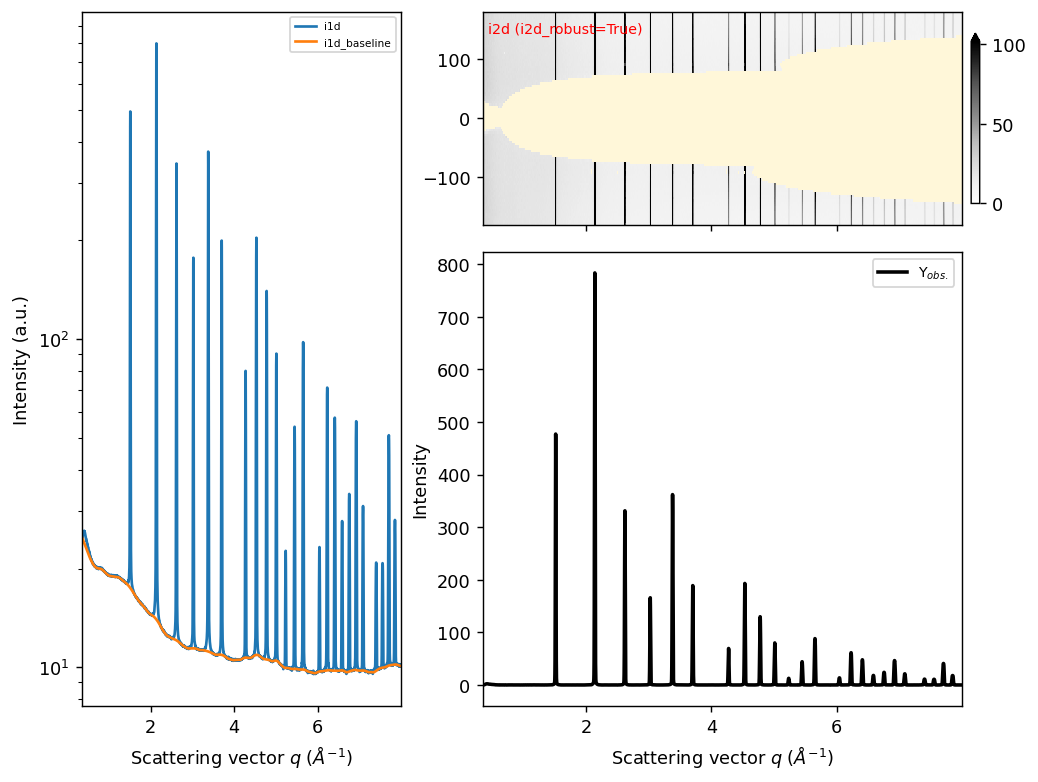

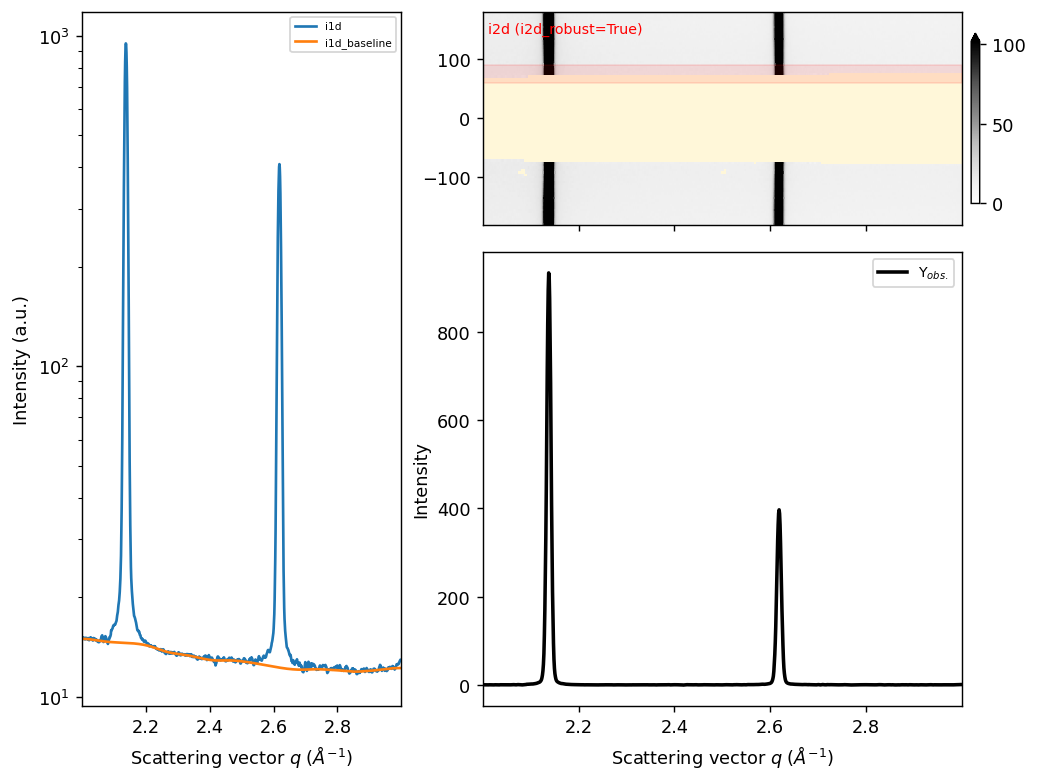

In [ ]:
sample = exrd(i1d_ylogscale=False, i2d_logscale=False)
sample.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
    radial_range=(0.35, 8),
)

# This is default
sample.get_baseline()

# Here we limit azimuthal range from 60 to 90 (red shaded area) and radial range from 2 to 3
sample.get_baseline(roi_azimuthal_range=(60, 90), roi_radial_range=(2, 3))

`spotty_data_correction` keyword is experimental and not fully implemented.

# load_phases

In [ ]:
?exrd.load_phases

Signature:
exrd.load_phases(
    self,
    from_phases_dict=None,
    from_gpx=None,
    from_nc=None,
    from_ds=None,
    mp_rester_api_key=None,
    plot=True,
)
Docstring: <no docstring>
File:      ~/easyXRD/easyxrd/core.py
Type:      function

As shown in previous notebooks, `01_basic.ipynb` and `02_intermediate.ipynb`, we can load structural phases by using ``load_phases` method.

Quickest way to load phases into easyXRD is using `from_phases_dict`

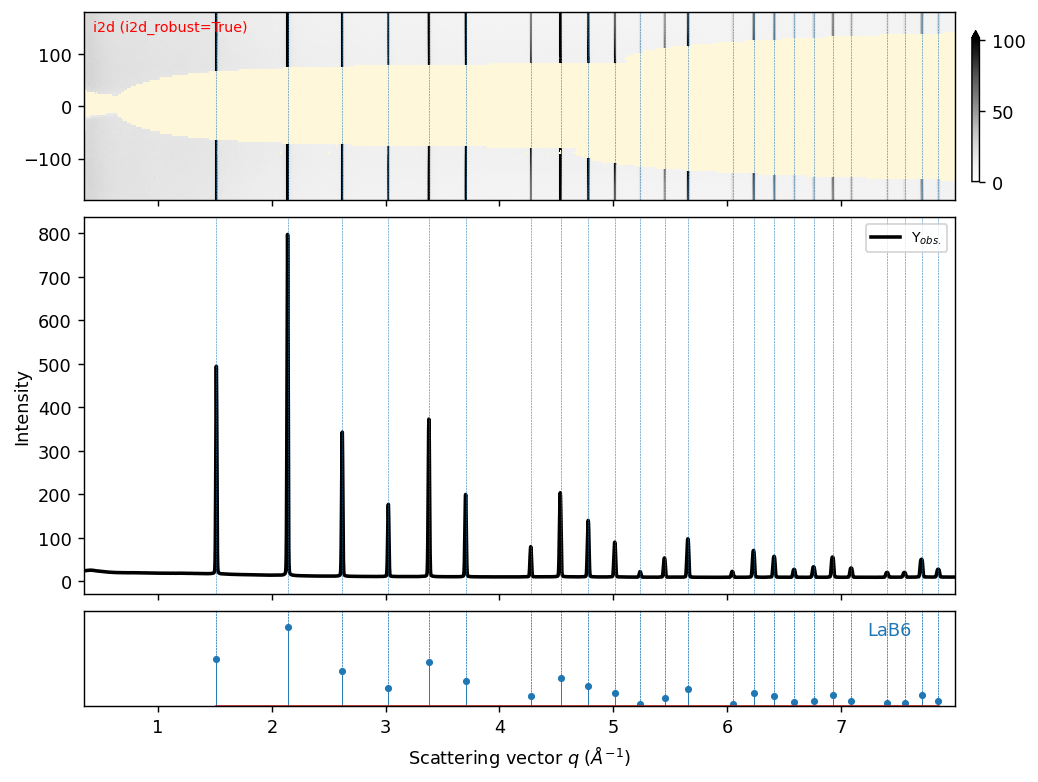

In [ ]:
sample = exrd(i1d_ylogscale=False, i2d_logscale=False)
sample.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
    radial_range=(0.35, 8),
)


phases = [
    {"cif": "LaB6/LaB6_structure_from_MaterialsProject.cif", "label": "LaB6"},
]  # this is a list and you can add multiple phases in it

sample.load_phases(phases)

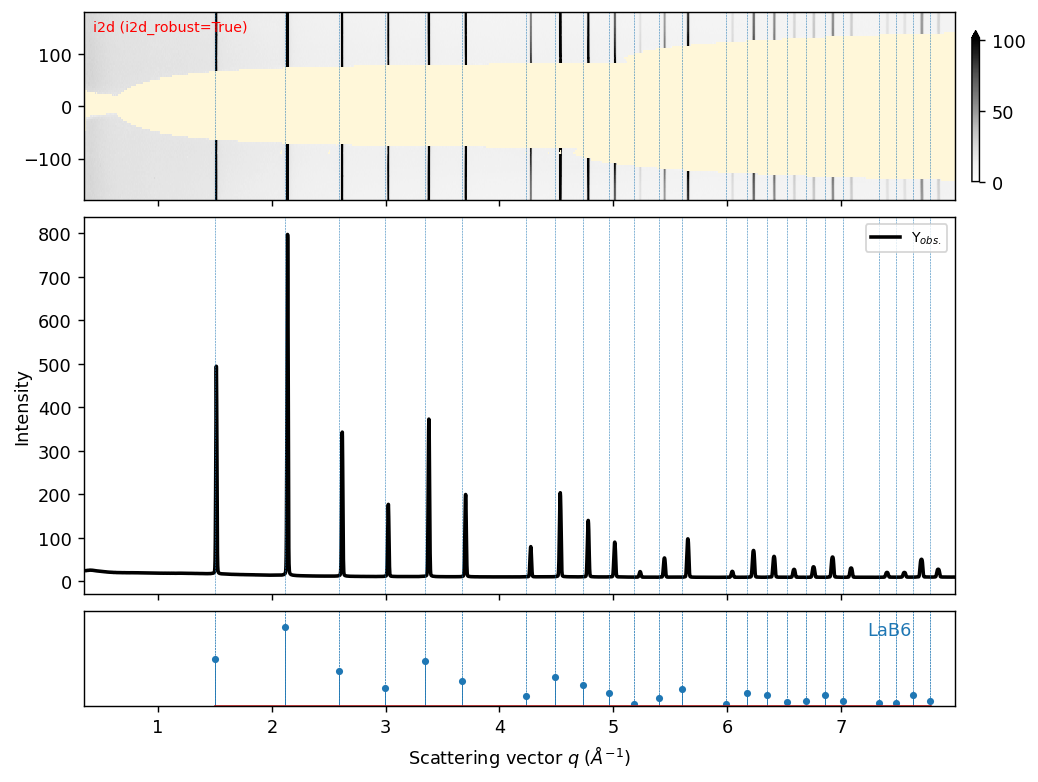

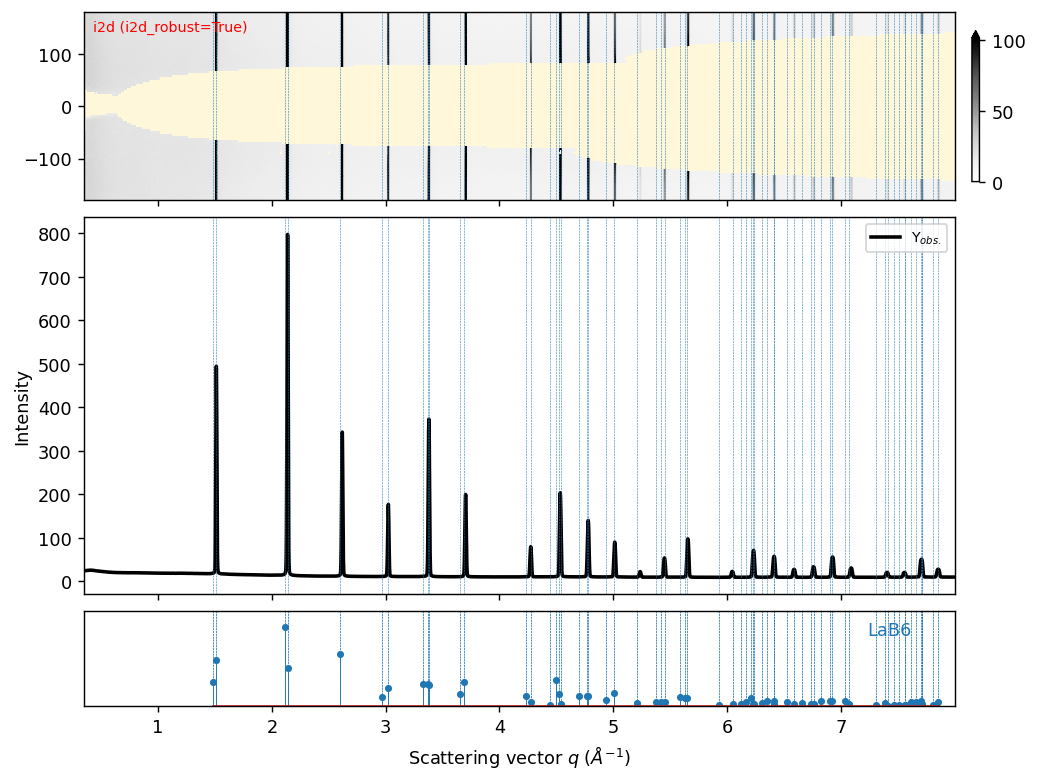

In [ ]:
# scale parameter in a phase scales all lattice dimensions, a/b/c, by scale amount.
# here we scale by 1.01 (1% increase)
phases = [
    {
        "cif": "LaB6/LaB6_structure_from_MaterialsProject.cif",
        "label": "LaB6",
        "scale": 1.01,
    },
]
sample.load_phases(phases)

# here we scale only first lattice vector, a by 1.02
phases = [
    {
        "cif": "LaB6/LaB6_structure_from_MaterialsProject.cif",
        "label": "LaB6",
        "scale_a": 1.02,
    },
]
sample.load_phases(phases)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

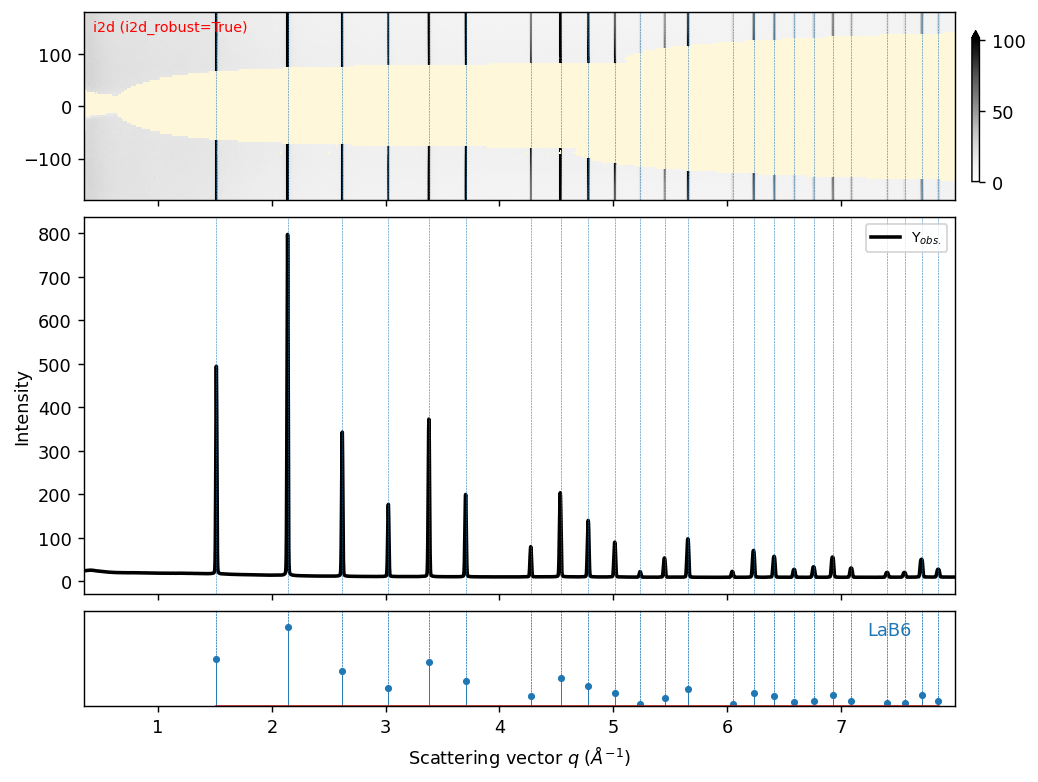

In [ ]:
# Instead of providing a cif file, we can pull the structural information from Materials Project
# But you need to provide an API key that you can easily obtain from the link below:
# https://next-gen.materialsproject.org/api#api-key

api_key = "-------your-mp-api-key-here-------"

phases = [
    {
        "mp_id": "mp-2680",
        "label": "LaB6",
    },
]
sample.load_phases(phases, mp_rester_api_key=api_key)

`from_ds` keyword of `load_phases` will read the phases from a previously produced exrd object.\
This is useful when doing sequential refinement that will be explained in future notebooks.

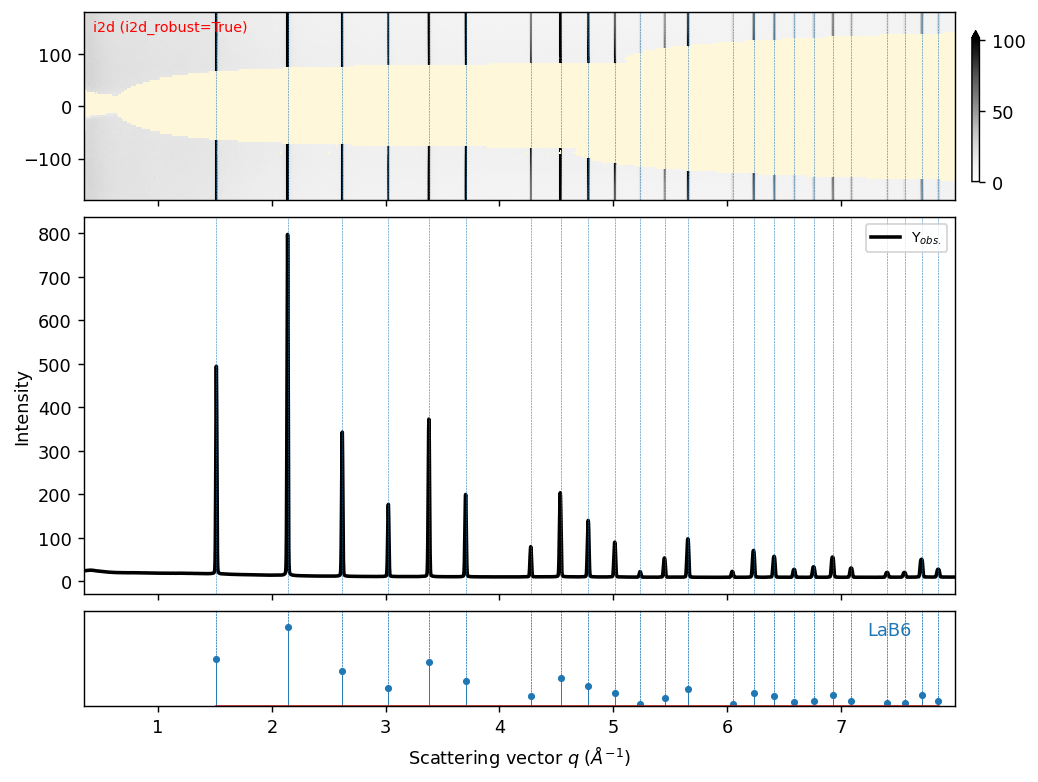

In [ ]:
# In order to demonstrate `from_gpx` keyword, we need to create a gpx object first.
sample = exrd(i1d_ylogscale=False, i2d_logscale=False)
sample.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
    radial_range=(0.35, 8),
)
phases = [
    {"cif": "LaB6/LaB6_structure_from_MaterialsProject.cif", "label": "LaB6"},
]
sample.load_phases(phases, plot=False)


sample2 = exrd(i1d_ylogscale=False, i2d_logscale=False)
sample2.load_xrd_data(
    from_tiff_file="LaB6/img.tiff",  # image file
    poni_file="geometry.poni",  # poni file you can get from pyFAI-calib2.
    mask_file="mask.edf",  # maks file you can get from pyFAI-drawmask.
    plot=False,
    radial_range=(0.35, 8),
)

sample2.load_phases(
    from_ds=sample.ds
)  # note that we are loading phases in sample2 from previously loaded sample object.

Similarly, `from_nc` keyword of `load_phases` will read the phases from a previously produced nc file.\

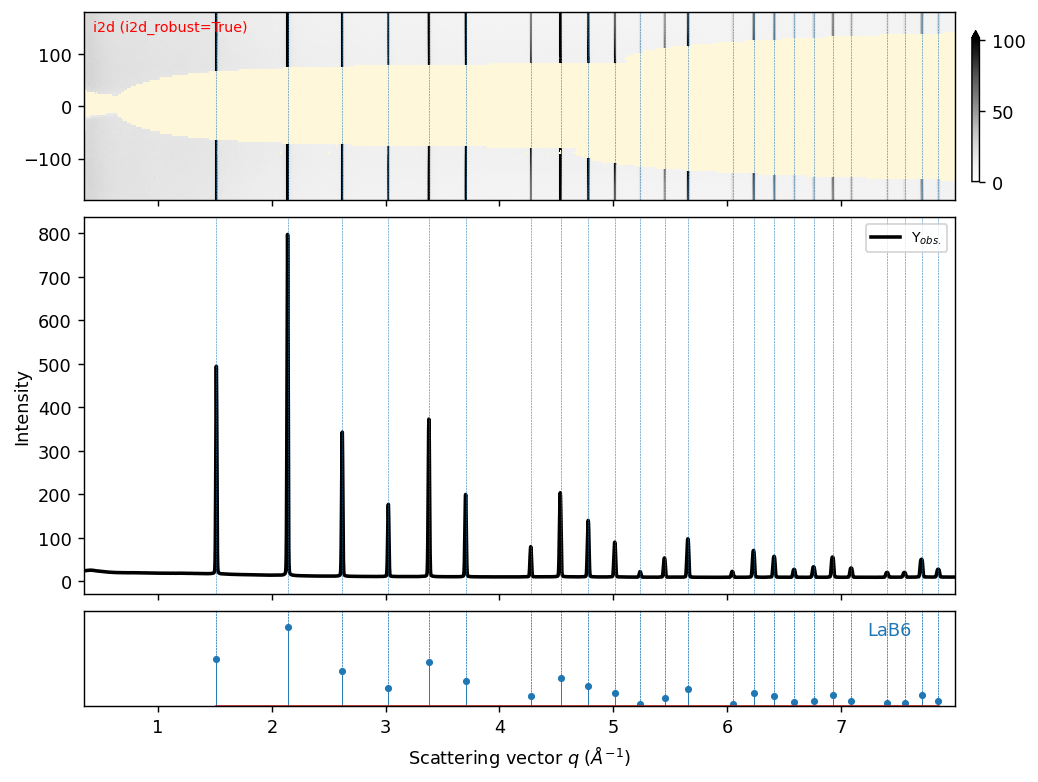

In [ ]:
sample.ds.to_netcdf("LaB6.nc")  # here first export a netcdf nc file.
sample2.load_phases(
    from_nc="LaB6.nc"
)  # Then we load phases in sample2 from generated nc file.